## Introduction
This is my second competition submission, where i put together what i have learned during my data science bootcamp and what i have learned through kaggle Data scientist and its courses.

Link to Dataset: https://www.kaggle.com/c/tabular-playground-series-mar-2021

## Table of Content 
    
   
   1. [The Challenge](#cell1)
   2. [Variables Overview](#cell2)
   2. [Importaing relevant libraries](#cell3)
   3. [importing dataset](#cell4)
   4. [Preprocessing dataset](#cell5)
       - Dealing with missing values
       - Data Type check
       - New numerical Dataframe
       - New categorical Dataframe
       
   5. [Feature Selection](#cell6)
       - Numerical Features
       - Categorical Features
       - Creating Dummy Variables for Categorical features 
        
        
   6. [Input and targets](#cell7)
   
   7. [Train, test , Split](#cell8)
   8. [Model Selection](#cell9)
       - Logistic Regression
       - Random Forest 
       - Ridge Classifier
       

## The challange <a id="cell1"></a>



## Variables Overview<a id="cell2"></a>

The dataset is used for this competition is synthetic but based on a real dataset and generated using a CTGAN. The original dataset deals with predicting the amount of an insurance claim. Although the features are anonymized, they have properties relating to real-world features.

## Importaing relevant libraries<a id="cell3"></a>

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


## Importing dataset<a id="cell4"></a>

In [2]:
raw_data = pd.read_csv('train.csv')
raw_data.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,...,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,...,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,...,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,...,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


## Pre-proccesing <a id="cell5"></a>

In [3]:
#Checking for Null values 
raw_data.isnull().sum()


id        0
cat0      0
cat1      0
cat2      0
cat3      0
cat4      0
cat5      0
cat6      0
cat7      0
cat8      0
cat9      0
cat10     0
cat11     0
cat12     0
cat13     0
cat14     0
cat15     0
cat16     0
cat17     0
cat18     0
cont0     0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
target    0
dtype: int64

In [4]:
cleaned_data=raw_data

### Data Type Check

In [5]:
#i check the data types of the features to better categorize between categorical varibles and numerical variables
cleaned_data.dtypes

id          int64
cat0       object
cat1       object
cat2       object
cat3       object
cat4       object
cat5       object
cat6       object
cat7       object
cat8       object
cat9       object
cat10      object
cat11      object
cat12      object
cat13      object
cat14      object
cat15      object
cat16      object
cat17      object
cat18      object
cont0     float64
cont1     float64
cont2     float64
cont3     float64
cont4     float64
cont5     float64
cont6     float64
cont7     float64
cont8     float64
cont9     float64
cont10    float64
target      int64
dtype: object

### New numerical Dataframe

In [6]:
# Droping all the catigorical featueres and creating a new dataframe with only the target, id and numerical values
data_num = cleaned_data.drop(['cat0','cat1','cat2','cat3','cat4','cat5','cat6','cat7','cat8','cat9','cat10','cat11','cat12','cat13','cat14','cat15','cat16','cat17','cat18'],axis=1)
data_num


,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,0.681700,0.500730,0.662428,0.671927,0.390566,0.145840,0.262767,0.514248,0.519340,0.617436,0.688007,0
299996,499995,0.489226,0.790664,0.821657,0.620356,0.384891,0.735879,0.547731,0.726653,0.470575,0.275743,0.638939,0
299997,499996,0.487882,0.522347,0.407037,0.232436,0.832482,0.810663,0.596939,0.308821,0.373997,0.518024,0.452144,1
299998,499997,0.331900,0.812891,0.808045,0.630708,0.346898,0.735147,0.563488,0.609836,0.680430,0.318453,0.335822,0


### New categorical Dataframe

In [7]:
# Droping all the numerical featueres and creating a new dataframe with only the target, id and numerical values
data_cat = cleaned_data.drop(['cont0','cont1','cont2','cont3','cont4','cont5','cont6','cont7','cont8','cont9','cont10'],axis=1)
data_cat

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,target
0,0,A,I,A,B,B,BI,A,S,Q,...,LO,A,A,A,A,B,D,D,B,0
1,1,A,I,A,A,E,BI,K,W,AD,...,HJ,A,B,A,B,D,B,D,B,0
2,2,A,K,A,A,E,BI,A,E,BM,...,DJ,A,B,A,A,B,D,D,B,0
3,3,A,K,A,C,E,BI,A,Y,AD,...,KV,A,A,A,A,B,D,D,B,0
4,4,A,I,G,B,E,BI,C,G,Q,...,DP,A,A,A,B,B,B,D,B,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,499993,A,N,F,A,E,BU,A,AS,K,...,HG,A,A,A,B,D,B,D,B,0
299996,499995,A,K,A,A,G,BI,A,K,AE,...,HK,A,B,A,B,B,D,D,B,0
299997,499996,A,G,M,A,H,BI,C,L,F,...,HC,B,A,A,B,D,B,D,D,1
299998,499997,B,H,A,D,B,BI,A,AA,AX,...,BF,A,A,A,A,B,A,D,A,0


### Numerical Visualazation

### Categorical Features Visualaziton 
The first thing i notic is that a couple of the featus have high unique values, which make it diffcult for creating dummies, so 
i try and see how i can segement these categorial features

In [8]:
data_cat.describe(include='all')

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,target
count,300000.000000,300000,300000,300000,300000,300000,300000,300000,300000,300000,...,300000,300000,300000,300000,300000,300000,300000,300000,300000,300000.000000
unique,NaN,2,15,19,13,20,84,16,51,61,...,299,2,2,2,2,4,4,4,4,NaN
top,NaN,A,I,A,A,E,BI,A,AH,BM,...,DJ,A,A,A,A,B,D,D,B,NaN
freq,NaN,223525,90809,168694,187251,129385,238563,187896,45818,42380,...,31584,258932,257139,292712,160166,203574,206906,247125,255482,NaN
mean,250183.425697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.264870
std,144320.334812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.441265
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,125399.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,250192.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,375246.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


## Input and targets<a id="cell7"></a>


In [9]:
targets = cleaned_data['target']
inputs = cleaned_data.drop(['target'], axis=1)

## Train, test , Split<a id="cell8"></a>

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,targets,test_size= 0.30,random_state=9)

## Feature Enginering  Count Encoding

In [11]:
from feature_engine.encoding import CountFrequencyEncoder

In [12]:
enc = CountFrequencyEncoder()

In [13]:
enc.fit(x_train)

CountFrequencyEncoder(variables=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5',
                                 'cat6', 'cat7', 'cat8', 'cat9', 'cat10',
                                 'cat11', 'cat12', 'cat13', 'cat14', 'cat15',
                                 'cat16', 'cat17', 'cat18'])

In [14]:
x_train_enc = enc.transform(x_train)

In [15]:
x_train_enc 

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,...,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
92757,155003,156467,22188,117870,131038,16289,166959,131441,11309,2337,...,0.700303,0.706412,0.319970,0.387799,0.815889,0.704707,0.393278,0.628078,0.401024,0.453001
92323,154234,156467,12128,6981,131038,53603,166959,50069,27584,17122,...,0.316152,0.378154,0.146251,0.774832,0.175175,0.506443,0.396943,0.319852,0.269310,0.416192
230946,385032,156467,63653,12770,131038,53603,166959,50069,5628,17122,...,0.154790,0.302913,0.588328,0.289799,0.151941,0.421960,0.279065,0.279754,0.286537,0.327165
53928,89918,156467,12128,117870,6096,53603,166959,131441,7885,15534,...,0.347205,0.311273,0.242078,0.196710,0.779519,0.819353,0.386223,0.366000,0.641509,0.444468
169609,282911,156467,30561,117870,56049,90690,29239,131441,32228,4851,...,0.429435,0.451802,0.303599,0.221951,0.356494,0.177202,0.531472,0.356943,0.321393,0.509018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91261,152457,156467,29454,12770,131038,90690,166959,131441,6760,10248,...,0.461490,0.427947,0.612861,0.222212,0.557131,0.343644,0.440462,0.721696,0.343003,0.458431
267158,445313,156467,12128,15976,131038,90690,29239,50069,794,29620,...,0.289212,0.257229,0.325195,0.827206,0.734871,0.405551,0.236880,0.353203,0.270254,0.326827
173819,290023,156467,22188,6981,131038,53603,166959,131441,11237,14567,...,0.764379,0.797406,0.873475,0.285810,0.354880,0.343767,0.684457,0.626904,0.803132,0.953600
196534,327967,156467,7856,12770,56049,19622,166959,131441,3984,4851,...,0.748943,0.755653,0.778929,0.239779,0.779848,0.196774,0.741119,0.642332,0.463299,0.824060


## Feature Selection 

In [16]:
from sklearn.feature_selection import SelectKBest

In [17]:
bestfeatures = SelectKBest(k=20)
fit = bestfeatures.fit(x_train_enc,y_train)

In [18]:
dfscore = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x_train_enc.columns)

In [19]:
feature = pd.concat([dfcolumns,dfscore],axis=1)
feature.columns = ['feature','Score']

In [20]:
#Plot
x_featued_sel = feature.nlargest(20, 'Score')

<AxesSubplot:xlabel='Score', ylabel='feature'>

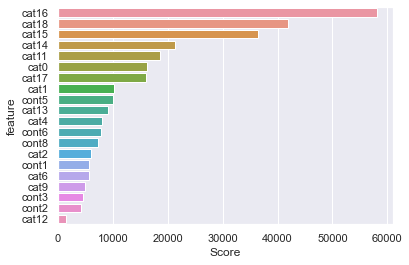

In [21]:
sns.barplot(y=x_featued_sel['feature'], x=x_featued_sel['Score'])

In [22]:
##Dropping all low performing features
x_cleaned = x_train_enc.drop(['cont0','cont4','cont7','cont9','cont10','cat2','cat3','cat5','cat7','cat8','cat10','cat12','cont2'],axis=1)


In [23]:
x_cleaned

,id,cat0,cat1,cat4,cat6,cat9,cat11,cat13,cat14,cat15,cat16,cat17,cat18,cont1,cont3,cont5,cont6,cont8
92757,155003,156467,22188,16289,131441,141230,181234,204919,97944,58138,59081,18383,15683,0.700303,0.319970,0.815889,0.704707,0.628078
92323,154234,156467,12128,53603,50069,141230,181234,5081,112056,142675,144880,172962,178800,0.316152,0.146251,0.175175,0.506443,0.319852
230946,385032,156467,63653,53603,50069,141230,181234,204919,97944,58138,59081,172962,178800,0.154790,0.588328,0.151941,0.421960,0.279754
53928,89918,156467,12128,53603,131441,141230,181234,204919,97944,58138,144880,172962,178800,0.347205,0.242078,0.779519,0.819353,0.366000
169609,282911,156467,30561,90690,131441,141230,181234,204919,112056,142675,144880,172962,178800,0.429435,0.303599,0.356494,0.177202,0.356943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91261,152457,156467,29454,90690,131441,10110,181234,204919,112056,142675,144880,172962,178800,0.461490,0.612861,0.557131,0.343644,0.721696
267158,445313,156467,12128,90690,50069,141230,181234,204919,97944,142675,144880,172962,178800,0.289212,0.325195,0.734871,0.405551,0.353203
173819,290023,156467,22188,53603,131441,141230,181234,204919,97944,142675,144880,172962,178800,0.764379,0.873475,0.354880,0.343767,0.626904
196534,327967,156467,7856,19622,131441,141230,181234,204919,97944,142675,144880,18383,178800,0.748943,0.778929,0.779848,0.196774,0.642332


## Scaling 

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_cleaned)

StandardScaler()

In [25]:
scaler.transform(x_cleaned)

array([[-0.66057681,  0.58492396, -0.47538892, ...,  1.30070652,
         1.02317964,  0.78336035],
       [-0.6659054 ,  0.58492396, -0.92988242, ..., -1.3535405 ,
         0.08569504, -0.93962933],
       [ 0.93335072,  0.58492396,  1.39792848, ..., -1.44978777,
        -0.31377989, -1.16377726],
       ...,
       [ 0.27500999,  0.58492396, -0.47538892, ..., -0.60908535,
        -0.68351595,  0.77679709],
       [ 0.5379333 ,  0.58492396, -1.12288403, ...,  1.1514007 ,
        -1.37856591,  0.86303902],
       [ 0.4272871 ,  0.58492396,  1.39792848, ..., -0.60583357,
        -1.08215302, -0.10869171]])

## Model Selection <a id="cell9"></a>

### Logistic model

In [26]:
from sklearn.linear_model import LogisticRegression
lgr= LogisticRegression()
lgr.fit(x_cleaned,y_train)

LogisticRegression()

In [27]:
y_pred_lgr = lgr.predict(x_cleaned)


In [28]:
sc_reg_lgr=confusion_matrix(y_train, y_pred_lgr)
sc_lgr = np.array(sc_reg_lgr)
accuracy_score_lgr = (sc_lgr[0,0]+sc_lgr[1,1])/sc_lgr.sum()
accuracy_score_lgr

0.8193190476190476

## KNeighborsClassifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(x_cleaned,y_train)

KNeighborsClassifier()

In [53]:
y_pred_knn = knc.predict(x_cleaned)

In [54]:
sc_conf_knc=confusion_matrix(y_train, y_pred_knn)
sc_knc = np.array(sc_conf_knc)
accuracy_score_knc = (sc_knc[0,0]+sc_knc[1,1])/sc_knc.sum()
accuracy_score_knc

0.8595

### Random Forest

In [75]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='gini',max_depth=40,max_features='auto')
rfc.fit(x_cleaned,y_train)

RandomForestClassifier(max_depth=40)

In [76]:
y_pred_rfc = rfc.predict(x_cleaned)
y_pred_rfc

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [77]:
sc_confr_rfc=confusion_matrix(y_train, y_pred_rfc)
sc_rfc = np.array(sc_confr_rfc)
accuracy_score_rfc = (sc_rfc[0,0]+sc_rfc[1,1])/sc_rfc.sum()
accuracy_score_rfc

0.9999714285714286

## Hyperparameter

In [65]:
#parameters
from sklearn.model_selection import RandomizedSearchCV
random_grid_par = {
'criterion' : ["gini", "entropy"],
'max_features': ['auto', 'sqrt'],
'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'bootstrap': [True, False]}

In [66]:
rfc_rg = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid_par, cv = 10, verbose=2, n_jobs = 6)

In [67]:
rfc_rg.fit(x_cleaned,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 11.5min
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed: 42.5min finished


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(criterion='entropy'),
                   n_jobs=6,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   verbose=2)

In [68]:
rfc_rg.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 40,
 'criterion': 'gini',
 'bootstrap': True}

In [69]:
rfc_rg.best_score_

0.8433571428571428

### Ridge Classifer

In [40]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier()
rc.fit(x_cleaned,y_train)



RidgeClassifier()

In [41]:
y_pred_rc = rc.predict(x_cleaned)
y_pred_rc

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
sc_conf_rc=confusion_matrix(y_train, y_pred_rc)
sc_rc = np.array(sc_conf_rc)
accuracy_score_rc = (sc_rc[0,0]+sc_rc[1,1])/sc_rc.sum()
accuracy_score_rc

0.8315

## SVC

from sklearn.svm import SVC

svc = SVC()
svc.fit(x_cleaned,y_train)



y_pred_svc = rc.predict(x_train)
y_pred_svc

sc_conf_svc=confusion_matrix(y_train, y_pred_svc)
sc_svc = np.array(sc_conf_svc)
accuracy_score_svc = (sc_svc[0,0]+sc_svc[1,1])/sc_svc.sum()
accuracy_score_svc

### Hyper Parameter Tuning SVC

grid = {
    'c': [1. 10, 100, 100]
    'kernel': ['rbf','linear']
    'gama':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
}


grid_search_cv = GridSearchCV(SVC(), param_grid=grid, scoring='accuracy')

## Test data 

In [43]:
test_data = pd.read_csv('test.csv')

In [44]:
enc.fit(test_data)
x_test = enc.transform(test_data)

In [45]:
x_test = x_test.drop(['cont0','cont4','cont7','cont9','cont10','cat2','cat3','cat5','cat7','cat8','cat10','cat12','cont2'],axis=1)

In [46]:
pred_values = rc.predict(x_test)

In [47]:
pred_values

array([0, 1, 0, ..., 1, 0, 0], dtype=int64)

In [48]:
pid = test_data['id']
pid

0              5
1              6
2              8
3              9
4             11
           ...  
199995    499983
199996    499984
199997    499987
199998    499994
199999    499998
Name: id, Length: 200000, dtype: int64

In [49]:
output = pd.DataFrame(pid, columns=['id'])
output['target'] = pred_values
output

,id,target
0,5,0
1,6,1
2,8,0
3,9,0
4,11,0
...,...,...
199995,499983,1
199996,499984,0
199997,499987,1
199998,499994,0


In [50]:
output.dtypes

id        int64
target    int64
dtype: object

In [51]:
output.to_csv(r'C:\Users\Hugo\Desktop\output.csv', index = False)